<a href="https://colab.research.google.com/github/MariaElsie/my-first-blog/blob/master/Group_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import tensorflow as tf
import keras
import numpy
import requests
from importlib.metadata import version
print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)
print("NumPy:", numpy.__version__)
print("Requests:", requests.__version__)
print("Rich:", version("rich"))

TensorFlow: 2.19.0
Keras: 3.10.0
NumPy: 2.0.2
Requests: 2.32.4
Rich: 13.9.4


In [3]:
#importing the main libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import glob
import shutil
from pathlib import Path


In [4]:
#importing the keras and tensorflow libraries
import tensorflow as tf
import keras
from keras import layers, models
from keras.utils import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [5]:
#importing utilities for image handling
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import time

In [6]:
#verifying my libraries again
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.19.0
Keras version: 3.10.0
NumPy version: 2.0.2


In [7]:
import os
Dataset = '/content/sample_data/Maize_Dataset_Final.zip'
File_path = "/content/sample_data/Maize_Dataset_Final.zip"


In [8]:
#Showing the file type of our maize dataset
def check_file_type(File_path):
    try:
        with open(File_path, 'rb') as f:
            header = f.read(4)  # Read first 4 bytes
            print(f"File header: {header}")

            # Common file signatures
            if header == b'PK\x03\x04':
                return "ZIP file"
            elif header.startswith(b'\x7fELF'):
                return "Executable file"
            elif header == b'\x89PNG':
                return "PNG image"
            elif header.startswith(b'\xff\xd8'):
                return "JPEG image"
            elif header == b'Rar!':
                return "RAR archive"
            else:
                return f"Unknown format: {header}"
    except Exception as e:
        return f"Error reading file: {e}"

print(check_file_type(File_path))

File header: b'PK\x03\x04'
ZIP file


In [9]:
import zipfile

# Quick opening and reading first file

File_path = "/content/sample_data/Maize_Dataset_Final.zip"
with zipfile.ZipFile(File_path, 'r') as zip_ref:
    first_file = zip_ref.namelist()[0]
    with zip_ref.open(first_file) as f:
        content = f.read()
        print(f"First file: {first_file}")
        print(f"Content: {content[:100]}...")

First file: Maize Dataset/Gray Leaf Spot/
Content: b''...


In [10]:
import zipfile
def safe_zip_open(File_path):
    try:
        with zipfile.ZipFile(File_path, 'r') as zip_ref:
            print("Zip file opened successfully!")
            print("Contents:", zip_ref.namelist())
            return True
    except zipfile.BadZipFile:
        print("File is not a valid zip file")
        return False
    except Exception as e:
        print(f"Other error: {e}")
        return False

safe_zip_open(File_path)

Zip file opened successfully!
Contents: ['Maize Dataset/Gray Leaf Spot/', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (10).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (100).jpg', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1000).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1001).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1002).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1003).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1004).jpg', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1005).jpg', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1006).jpg', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1007).jpg', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1008).jpg', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1009).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (101).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1010).JPG', 'Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1011).JPG', 'Maiz

True

In [11]:
import zipfile
from PIL import Image
import os
import io
File_path = ('/content/sample_data/Maize_Dataset_Final.zip')
#Check if file exists
if not os.path.exists(File_path):
    print("File does not exist!")
    exit()
    # Check file size
file_size = os.path.getsize(File_path)
print(f"File size: {file_size} bytes")

if file_size == 0:
    print("File is empty!")


File size: 1043501629 bytes


In [12]:
import os #checking my file path again since it cant be opened
os.listdir("/content")
os.listdir("/content/sample_data")

['README.md',
 'anscombe.json',
 'Maize_Dataset_Final.zip',
 'mnist_test.csv',
 'california_housing_train.csv',
 'california_housing_test.csv',
 'mnist_train_small.csv']

First image file: Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1).JPG
Image format: JPEG
Image size: (256, 256)
Image mode: RGB


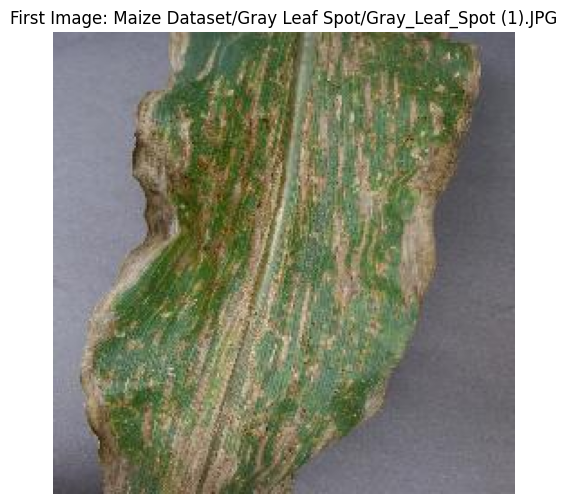


Total images in dataset: 7481
First 5 image files:
  1. Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1).JPG
  2. Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (10).JPG
  3. Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (100).jpg
  4. Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1000).JPG
  5. Maize Dataset/Gray Leaf Spot/Gray_Leaf_Spot (1001).JPG


In [13]:
import matplotlib.pyplot as plt

# Quick open and displaying first image from dataset
File_path = "/content/sample_data/Maize_Dataset_Final.zip"
with zipfile.ZipFile(File_path, 'r') as zip_ref:
    # Getting all image files
    image_files = [f for f in zip_ref.namelist() if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    if not image_files:
        print("No image files found in the ZIP archive")
    else:
        # Getting the first image file
        first_image = image_files[0]
        print(f"First image file: {first_image}")

        # Opening and displaying the image
        with zip_ref.open(first_image) as f:
            # Read image data
            img_data = f.read()

            # Opening the image with PIL
            img = Image.open(io.BytesIO(img_data))

            # Displaying image information
            print(f"Image format: {img.format}")
            print(f"Image size: {img.size}")
            print(f"Image mode: {img.mode}")

            # Displaying the image
            plt.figure(figsize=(8, 6))
            plt.imshow(img)
            plt.title(f"First Image: {first_image}")
            plt.axis('off')
            plt.show()

        # Showing total image count
        print(f"\nTotal images in dataset: {len(image_files)}")

        # Showing first few image names
        print("First 5 image files:")
        for i, img_file in enumerate(image_files[:5]):
            print(f"  {i+1}. {img_file}")

In [14]:
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image

In [15]:
# Paths

File_path = "/content/sample_data/Maize_Dataset_Final.zip"
output_dir = "split_dataset"
os.makedirs(output_dir, exist_ok=True)

# Extract and get image paths with labels
image_paths = []
labels = []

with zipfile.ZipFile(File_path, 'r') as zip_ref:
    # Get all image files and their class labels
    for file_name in zip_ref.namelist():
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            # Extract class name from path (assuming structure: parent/class/image.jpg)
            parts = file_name.split('/')
            if len(parts) >= 3:  # parent/class/image.jpg
                class_name = parts[1]  # Second part is class name
                image_paths.append(file_name)
                labels.append(class_name)

    print(f"Total images: {len(image_paths)}")
    print(f"Classes: {set(labels)}")
    print(f"Images per class: { {cls: labels.count(cls) for cls in set(labels)} }")

    # Split dataset: 70% train, 15% validation, 15% test
    X_temp, X_test, y_temp, y_test = train_test_split(
        image_paths, labels, test_size=0.15, random_state=42, stratify=labels
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp  # 0.1765 ≈ 15/85
    )

    print(f"\n Split sizes:")
    print(f"Train: {len(X_train)} images")
    print(f"Validation: {len(X_val)} images")
    print(f"Test: {len(X_test)} images")

    # Create directories and copy files
    splits = {
        'train': (X_train, y_train),
        'val': (X_val, y_val),
        'test': (X_test, y_test)
    }

    for split_name, (files, labels_list) in splits.items():
        split_dir = os.path.join(output_dir, split_name)
        os.makedirs(split_dir, exist_ok=True)

        for file_path, label in zip(files, labels_list):
            # Create class directory
            class_dir = os.path.join(split_dir, label)
            os.makedirs(class_dir, exist_ok=True)

            # Extract file
            zip_ref.extract(file_path, class_dir)

            # Renaming to avoid path issues
            extracted_path = os.path.join(class_dir, file_path)
            final_path = os.path.join(class_dir, os.path.basename(file_path))
            if os.path.exists(extracted_path):
                os.rename(extracted_path, final_path)

print("Dataset split completed!")

Total images: 7481
Classes: {'MLN 1&2', 'Gray Leaf Spot', 'Healthy11'}
Images per class: {'MLN 1&2': 3980, 'Gray Leaf Spot': 1642, 'Healthy11': 1859}

 Split sizes:
Train: 5235 images
Validation: 1123 images
Test: 1123 images
Dataset split completed!


In [16]:
#Data preprocessing and Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

# Only rescaling for validation and test (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Creating data generators
train_generator = train_datagen.flow_from_directory(
    'split_dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    'split_dataset/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    'split_dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Classes detected:", train_generator.class_indices)

Found 5235 images belonging to 3 classes.
Found 1123 images belonging to 3 classes.
Found 1123 images belonging to 3 classes.
Classes detected: {'Gray Leaf Spot': 0, 'Healthy11': 1, 'MLN 1&2': 2}


In [17]:
# Checking if classes are balanced to avoid overfitting and underfitting of our model
print("Training class distribution:")
for class_name, class_idx in train_generator.class_indices.items():
    count = sum(1 for label in train_generator.labels if label == class_idx)
    print(f"  {class_name}: {count} images ({count/len(train_generator.labels):.1%})")

Training class distribution:
  Gray Leaf Spot: 1149 images (21.9%)
  Healthy11: 1301 images (24.9%)
  MLN 1&2: 2785 images (53.2%)


In [18]:
#Correcting the class imbalances to prevent biases
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculating class weights to balance the loss function
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.labels),
    y=train_generator.labels
)

class_weights_dict = dict(enumerate(class_weights))
print("Recommended class weights:", class_weights_dict)

Recommended class weights: {0: np.float64(1.5187119234116624), 1: np.float64(1.3412759415833975), 2: np.float64(0.6265709156193896)}


In [19]:
# Enhanced augmentation for minority classes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,  # Increased for minority classes
    height_shift_range=0.3, # Increased for minority classes
    shear_range=0.3,        # Increased for minority classes
    zoom_range=0.3,         # Increased for minority classes
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7, 1.3]  # Wider range
)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image

# Paths to the training data
train_dir = 'split_dataset/train'
gray_leaf_dir = os.path.join(train_dir, 'Gray Leaf Spot')
healthy_dir = os.path.join(train_dir, 'Healthy11')
mln_dir = os.path.join(train_dir, 'MLN 1&2')

# Counting current images
gray_leaf_count = len(os.listdir(gray_leaf_dir))
healthy_count = len(os.listdir(healthy_dir))
mln_count = len(os.listdir(mln_dir))

print(f"Current counts - Gray Leaf Spot: {gray_leaf_count}, Healthy11: {healthy_count}, MLN 1&2: {mln_count}")

# Target number of images (match the majority class)
target_count = mln_count  # 2785

# Enhanced augmentation for minority classes
augmentation_datagen = ImageDataGenerator(
    rotation_range=50,           # Increased rotation
    width_shift_range=0.4,       # Increased shift
    height_shift_range=0.4,      # Increased shift
    shear_range=0.4,             # Increased shear
    zoom_range=0.4,              # Increased zoom
    horizontal_flip=True,
    vertical_flip=True,          # Added vertical flip
    brightness_range=[0.6, 1.4], # Wider brightness range
    fill_mode='nearest'
)

def augment_class_images(class_dir, target_count, save_to_original=True):
    """Augment images for a specific class to reach target count"""
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(image_files)
    needed_count = target_count - current_count

    if needed_count <= 0:
        return current_count

    print(f"Augmenting {os.path.basename(class_dir)}: need {needed_count} more images")

    augmented_count = 0
    while augmented_count < needed_count:
        for img_file in image_files:
            if augmented_count >= needed_count:
                break

            img_path = os.path.join(class_dir, img_file)
            img = Image.open(img_path)
            img_array = np.array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Generating augmented images
            aug_iter = augmentation_datagen.flow(
                img_array,
                batch_size=1,
                save_to_dir=class_dir if save_to_original else class_dir + '_augmented',
                save_prefix='aug',
                save_format='jpg'
            )

            # Saving one augmented image
            aug_img = next(aug_iter)[0].astype('uint8')
            augmented_count += 1

            if augmented_count % 100 == 0:
                print(f"Generated {augmented_count}/{needed_count} augmented images")

    return current_count + augmented_count

# Augmenting minority classes
print("Augmenting minority classes...")
final_gray_count = augment_class_images(gray_leaf_dir, target_count)
final_healthy_count = augment_class_images(healthy_dir, target_count)

print(f"Final counts - Gray Leaf Spot: {final_gray_count}, Healthy11: {final_healthy_count}, MLN 1&2: {mln_count}")

Current counts - Gray Leaf Spot: 1150, Healthy11: 1302, MLN 1&2: 2786
Augmenting minority classes...
Augmenting Gray Leaf Spot: need 1637 more images
Generated 100/1637 augmented images
Generated 200/1637 augmented images
Generated 300/1637 augmented images
Generated 400/1637 augmented images
Generated 500/1637 augmented images
Generated 600/1637 augmented images
Generated 700/1637 augmented images
Generated 800/1637 augmented images
Generated 900/1637 augmented images
Generated 1000/1637 augmented images
Generated 1100/1637 augmented images
Generated 1200/1637 augmented images
Generated 1300/1637 augmented images
Generated 1400/1637 augmented images
Generated 1500/1637 augmented images
Generated 1600/1637 augmented images
Augmenting Healthy11: need 1485 more images
Generated 100/1485 augmented images
Generated 200/1485 augmented images
Generated 300/1485 augmented images
Generated 400/1485 augmented images
Generated 500/1485 augmented images
Generated 600/1485 augmented images
Generat

In [21]:
# Checking new distribution
augmented_counts = {}
for class_name in ['Gray Leaf Spot', 'Healthy11', 'MLN 1&2']:
    class_dir = os.path.join('split_dataset/train', class_name)
    augmented_counts[class_name] = len([f for f in os.listdir(class_dir)
                                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

print("After augmentation:")
for class_name, count in augmented_counts.items():
    print(f"  {class_name}: {count} images")

After augmentation:
  Gray Leaf Spot: 2660 images
  Healthy11: 2681 images
  MLN 1&2: 2785 images


In [22]:
#Model Architecture Selection & Compilation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

def create_enhanced_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Block 2
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Block 3
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Block 4
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Classifier
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Creating and compiling the model
model = create_enhanced_cnn_model(num_classes=3)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 19,399,363 (74.00 MB)

 Trainable params: 19,397,379 (74.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [23]:
#Setting Up Advanced Callbacks for saving the progress
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
import datetime

# Timestamp for unique file names
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks
callbacks = [
    ModelCheckpoint(
        f'best_maize_model_{timestamp}.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=8,
        min_lr=1e-7,
        verbose=1
    ),
    TensorBoard(
        log_dir=f'logs/{timestamp}',
        histogram_freq=1
    )
]

In [24]:
#Training the model from the enhanced dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Enhanced data augmentation specifically for the class imbalance
enhanced_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0,1]
    rotation_range=50,        # Increased rotation (50 degrees) for more diversity
    width_shift_range=0.4,    # Increased horizontal shift (40% of width)
    height_shift_range=0.4,   # Increased vertical shift (40% of height)
    shear_range=0.4,          # Increased shear transformation
    zoom_range=0.4,           # Increased zoom range
    horizontal_flip=True,     # Random horizontal flipping
    vertical_flip=True,       # Added vertical flipping (extra augmentation)
    brightness_range=[0.6, 1.4],  # Wider brightness adjustment
    channel_shift_range=50,   # Color channel shifting for color variation
    fill_mode='nearest'       # Fill missing pixels with nearest values
)

# Creating the enhanced train generator
enhanced_train_generator = enhanced_datagen.flow_from_directory(
    directory='split_dataset/train',  # Path to our training data
    target_size=(224, 224),           # Resize all images to 224x224 pixels
    batch_size=32,                    # Number of images per batch
    class_mode='categorical',         # For multi-class classification
    shuffle=True,                     # Shuffle the data each epoch
    seed=42                           # Random seed for reproducibility
)

# Verifying the generator was created correctly
print("Enhanced Train Generator Created!")
print(f"Found {enhanced_train_generator.samples} images")
print(f"Number of classes: {len(enhanced_train_generator.class_indices)}")
print("Class mapping:", enhanced_train_generator.class_indices)

# Calculating class weights for the imbalance
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(enhanced_train_generator.labels),
    y=enhanced_train_generator.labels
)
class_weights_dict = dict(enumerate(class_weights))

print("\n Class weights to balance training:")
for class_name, idx in enhanced_train_generator.class_indices.items():
    print(f"  {class_name}: {class_weights_dict[idx]:.2f}")

# Calculating the steps our model will take through each epoch
train_steps = len(enhanced_train_generator)
val_steps = len(val_generator)

print(f"\n Training steps per epoch: {train_steps}")
print(f" Validation steps: {val_steps}")

Found 8126 images belonging to 3 classes.
Enhanced Train Generator Created!
Found 8126 images
Number of classes: 3
Class mapping: {'Gray Leaf Spot': 0, 'Healthy11': 1, 'MLN 1&2': 2}

 Class weights to balance training:
  Gray Leaf Spot: 1.02
  Healthy11: 1.01
  MLN 1&2: 0.97

 Training steps per epoch: 254
 Validation steps: 36


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import os
import datetime

# Creating Model Architecture
def create_maize_disease_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential([
        # First Conv Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Second Conv Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Third Conv Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Fourth Conv Block
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Classifier
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

#Creating the model
model = create_maize_disease_model(num_classes=3)

#Compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

print("Model created and compiled!")
model.summary()

#Creating the Checkpoint Directory
checkpoint_dir = "model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Setting up Callbacks for Saving Progress
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

callbacks = [
    # Saving the best model based on validation accuracy
    ModelCheckpoint(
        os.path.join(checkpoint_dir, f'best_model_{timestamp}.keras'),
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),

    # Always Saving the latest model (for resuming)
    ModelCheckpoint(
        os.path.join(checkpoint_dir, 'latest_model.keras'),
        save_freq='epoch',
        verbose=1
    ),

    # Saving the training history
    CSVLogger(os.path.join(checkpoint_dir, 'training_history.csv'), append=True),

    # Early stopping to prevent overfitting
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),

    # Reducing learning rate when stuck
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=8,
        min_lr=1e-7,
        verbose=1
    )
]

print("Callbacks setup complete!")

# Resuming Training if Checkpoint Exists
initial_epoch = 0
latest_checkpoint_path = os.path.join(checkpoint_dir, 'latest_model.keras')

if os.path.exists(latest_checkpoint_path):
    print("Resuming training from latest checkpoint...")
    model.load_weights(latest_checkpoint_path)

    #Getting the correct epoch from CSV history
    history_csv_path = os.path.join(checkpoint_dir, 'training_history.csv')
    if os.path.exists(history_csv_path):
        import pandas as pd
        try:
            history_df = pd.read_csv(history_csv_path)
            if not history_df.empty:
                initial_epoch = len(history_df)
                print(f"Resuming from epoch {initial_epoch}")
        except:
            print("Could not read history file, starting from epoch 0")
else:
    print("Starting new training session")

# Training the Model
print("Starting training...")
print(f"Initial epoch: {initial_epoch}")

history = model.fit(
    enhanced_train_generator,
    steps_per_epoch=train_steps,
    epochs=100,
    initial_epoch=initial_epoch,
    validation_data=val_generator,
    validation_steps=val_steps,
    class_weight=class_weights_dict,
    callbacks=callbacks,
    verbose=1
)

print("Training completed!")

# Saving the Final Model
model.save('maize_disease_final_model.keras')
print("Final model saved as 'maize_disease_final_model.keras'")

Model created and compiled!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 19,399,363 (74.00 MB)

 Trainable params: 19,397,379 (74.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

Callbacks setup complete!
Starting new training session
Starting training...
Initial epoch: 0
Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.7756 - loss: 0.7152 - precision: 0.7840 - recall: 0.7684
Epoch 1: val_accuracy improved from -inf to 0.52360, saving model to model_checkpoints/best_model_20250926_084118.keras

Epoch 1: saving model to model_checkpoints/latest_model.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 164s 579ms/step - accuracy: 0.7758 - loss: 0.7146 - precision: 0.7842 - recall: 0.7685 - val_accuracy: 0.5236 - val_loss: 1.6848 - val_precision: 0.5241 - val_recall: 0.5236 - learning_rate: 0.0010
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8620 - loss: 0.3723 - precision: 0.8678 - recall: 0.8557
Epoch 2: val_accuracy improved from 0.52360 to 0.91451, saving model to model_checkpoints/best_model_20250926_084118.keras

Epoch 2: saving model to model_checkpoints/latest_model.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 136s 534ms/step - accuracy: 0

In [26]:
# Adding these functions to manage my training
def list_saved_models():
    """List all saved models"""
    if os.path.exists(checkpoint_dir):
        models = os.listdir(checkpoint_dir)
        print("Saved models:")
        for model_file in models:
            if model_file.endswith('.keras'):
                size = os.path.getsize(os.path.join(checkpoint_dir, model_file)) / (1024*1024)
                print(f"  - {model_file} ({size:.1f} MB)")

def load_best_model():
    """Load the best model based on validation accuracy"""
    best_models = [f for f in os.listdir(checkpoint_dir) if f.startswith('best_model')]
    if best_models:
        best_model_path = os.path.join(checkpoint_dir, sorted(best_models)[-1])  # Getting latest best model
        model.load_weights(best_model_path)
        print(f"Loaded best model: {best_model_path}")
        return model
    else:
        print("No best model found")
        return None

# Listing available models after training
list_saved_models()

Saved models:
  - latest_model.keras (222.1 MB)
  - best_model_20250926_084118.keras (222.1 MB)


In [27]:
# Checking my training status
def check_training_status():
    """Check the current training status"""
    if os.path.exists(checkpoint_dir):
        # Checking if latest model exists
        latest_model = os.path.join(checkpoint_dir, 'latest_model.keras')
        if os.path.exists(latest_model):
            # Checking training history
            history_csv = os.path.join(checkpoint_dir, 'training_history.csv')
            if os.path.exists(history_csv):
                import pandas as pd
                history_df = pd.read_csv(history_csv)
                if not history_df.empty:
                    latest_epoch = len(history_df)
                    latest_accuracy = history_df['accuracy'].iloc[-1]
                    latest_val_accuracy = history_df['val_accuracy'].iloc[-1]
                    print(f" Training Status: Epoch {latest_epoch}")
                    print(f" Latest Accuracy: {latest_accuracy:.4f}")
                    print(f" Latest Val Accuracy: {latest_val_accuracy:.4f}")
                    return
    print(" No training history found")

# Check status
check_training_status()

 Training Status: Epoch 36
 Latest Accuracy: 0.9847
 Latest Val Accuracy: 0.9875


 Loaded best model: model_checkpoints/best_model_20250926_084118.keras
 Evaluating on test set...
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9943 - loss: 0.0146 - precision: 0.9943 - recall: 0.9943

 Final Test Performance:
Accuracy: 0.9893
Precision: 0.9893
Recall: 0.9893
F1-Score: 0.9893
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step

 Detailed Classification Report:
                precision    recall  f1-score   support

Gray Leaf Spot       0.97      1.00      0.99       247
     Healthy11       0.99      0.99      0.99       279
       MLN 1&2       0.99      0.98      0.99       597

      accuracy                           0.99      1123
     macro avg       0.99      0.99      0.99      1123
  weighted avg       0.99      0.99      0.99      1123



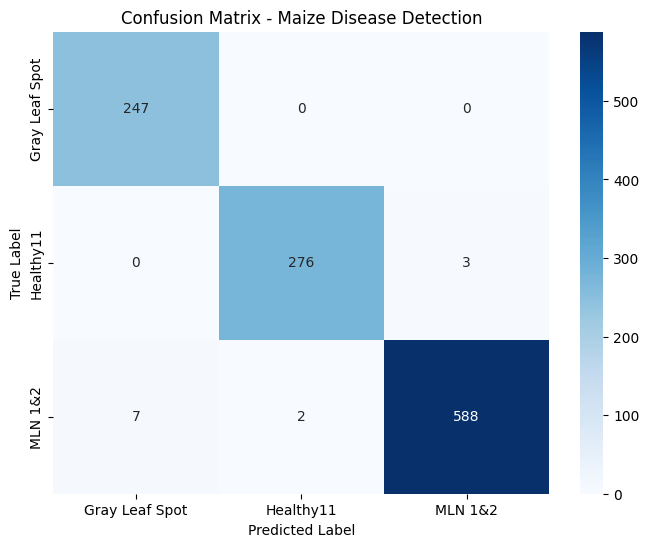

In [28]:
#Analyzing the training results
def analyze_training_results():
    """Comprehensive analysis of training results"""

    # Loading the best model
    best_model_path = os.path.join(checkpoint_dir, 'best_model_*.keras')
    best_models = [f for f in os.listdir(checkpoint_dir) if f.startswith('best_model_')]

    if best_models:
        best_model_path = os.path.join(checkpoint_dir, sorted(best_models)[-1])
        model.load_weights(best_model_path)
        print(f" Loaded best model: {best_model_path}")

    # Evaluating on test set
    print(" Evaluating on test set...")
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)

    print(f"\n Final Test Performance:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-Score: {2*(test_precision*test_recall)/(test_precision+test_recall):.4f}")

    # Detailed predictions
    test_generator.reset()
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes

    # Classification report
    from sklearn.metrics import classification_report, confusion_matrix
    class_names = list(test_generator.class_indices.keys())

    print("\n Detailed Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

    # Confusion matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Maize Disease Detection')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

analyze_training_results()

In [39]:
#Doing an error analysis
import numpy as np
from sklearn.metrics import confusion_matrix

# Generating predictions
test_generator.reset()  # Resetting generator to beginning
y_pred = model.predict(test_generator)  # Getting probability predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Converting to class indices
y_true = test_generator.classes  # True labels
class_names = list(test_generator.class_indices.keys())  # Class names

print(f"True labels shape: {y_true.shape}")
print(f"Predicted labels shape: {y_pred_classes.shape}")
print(f"Class names: {class_names}")

# Performing the error analysis
def quick_error_analysis(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)

    print(" QUICK ERROR ANALYSIS")
    print("=" * 40)

    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    error_rate = 1 - accuracy

    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Overall Error Rate: {error_rate:.4f}")
    print(f"Misclassified: {np.sum(cm) - np.sum(np.diag(cm))} samples")

    print("\n Per-class Error Rates:")
    for i, class_name in enumerate(class_names):
        class_error = 1 - (cm[i, i] / np.sum(cm[i, :])) if np.sum(cm[i, :]) > 0 else 0
        print(f"  {class_name}: {class_error:.4f}")

    error_rates = [1 - (cm[i, i] / np.sum(cm[i, :])) if np.sum(cm[i, :]) > 0 else 0
                   for i in range(len(class_names))]
    worst_class_idx = np.argmax(error_rates)
    print(f"\n Worst performing class: {class_names[worst_class_idx]} (Error: {error_rates[worst_class_idx]:.4f})")

# Calling the error analysis function
quick_error_analysis(y_true, y_pred_classes, class_names)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step
True labels shape: (1123,)
Predicted labels shape: (1123,)
Class names: ['Gray Leaf Spot', 'Healthy11', 'MLN 1&2']
 QUICK ERROR ANALYSIS
Overall Accuracy: 0.9893
Overall Error Rate: 0.0107
Misclassified: 12 samples

 Per-class Error Rates:
  Gray Leaf Spot: 0.0000
  Healthy11: 0.0108
  MLN 1&2: 0.0151

 Worst performing class: MLN 1&2 (Error: 0.0151)


In [40]:
#Creating a prediction pipeline to test predictions
def create_prediction_system():
    """Creating a complete prediction system"""

    # Loading the best model
    best_models = [f for f in os.listdir(checkpoint_dir) if f.startswith('best_model_')]
    if best_models:
        best_model_path = os.path.join(checkpoint_dir, sorted(best_models)[-1])
        prediction_model = tf.keras.models.load_model(best_model_path)
    else:
        prediction_model = model

    class_names = list(test_generator.class_indices.keys())

    def predict_maize_disease(image_path):
        """Predicting disease from single image"""
        from tensorflow.keras.preprocessing import image
        import numpy as np

        # Loading and preprocessing the image
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Making a prediction
        predictions = prediction_model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        confidence = np.max(predictions)

        return {
            'disease': class_names[predicted_class],
            'confidence': float(confidence),
            'all_predictions': {class_names[i]: float(pred) for i, pred in enumerate(predictions[0])}
        }

    # Testing with sample images
    print(" Testing prediction system...")

    # Finding sample images from test set
    sample_images = []
    for class_name in class_names:
        class_path = os.path.join('split_dataset/test', class_name)
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png'))]
            if images:
                sample_images.append(os.path.join(class_path, images[0]))

    for img_path in sample_images[:2]:  # Testing with 2 samples
        result = predict_maize_disease(img_path)
        print(f"\n Prediction for {os.path.basename(img_path)}:")
        print(f"   Disease: {result['disease']}")
        print(f"   Confidence: {result['confidence']:.2%}")

    return predict_maize_disease

# Creating and calling the prediction function
predict_disease = create_prediction_system()

 Testing prediction system...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

 Prediction for Gray_Leaf_Spot (1425).jpg:
   Disease: Gray Leaf Spot
   Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

 Prediction for Healthy (730).jpg:
   Disease: Healthy11
   Confidence: 99.90%


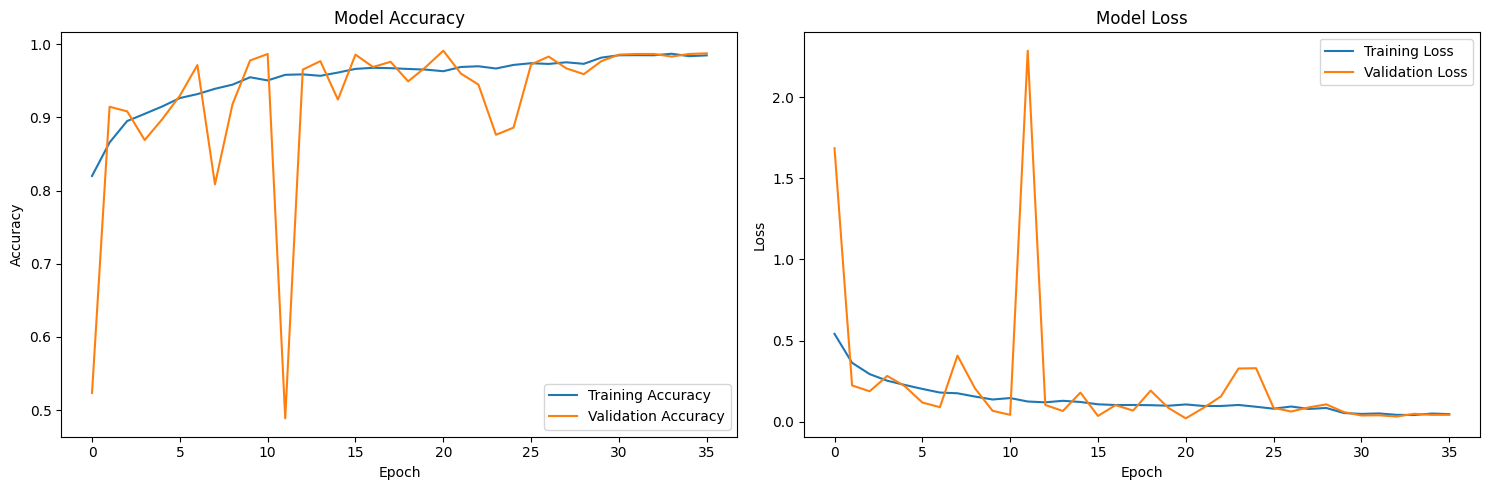

 Training Analysis:
   Final Train Accuracy: 0.9847
   Final Val Accuracy: 0.9875
   Accuracy Gap: -0.0028
 Good generalization!


In [50]:
#Model Optimization and fine tuning/ Checking for underfitting and overfitting
def optimize_model():
    """Optimizing the model based on training results"""

    # Analyzing the training curves
    history_csv = os.path.join(checkpoint_dir, 'training_history.csv')
    if os.path.exists(history_csv):
        import pandas as pd
        import matplotlib.pyplot as plt

        history_df = pd.read_csv(history_csv)

        # Plotting the training history
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history_df['accuracy'], label='Training Accuracy')
        plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history_df['loss'], label='Training Loss')
        plt.plot(history_df['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Analyzing for overfitting/underfitting
        final_train_acc = history_df['accuracy'].iloc[-1]
        final_val_acc = history_df['val_accuracy'].iloc[-1]
        gap = final_train_acc - final_val_acc

        print(f" Training Analysis:")
        print(f"   Final Train Accuracy: {final_train_acc:.4f}")
        print(f"   Final Val Accuracy: {final_val_acc:.4f}")
        print(f"   Accuracy Gap: {gap:.4f}")

        if gap > 0.15:
            print(" Significant overfitting detected!")
            print(" Recommendation: Increase dropout, add more augmentation")
        elif gap < 0.02 and (final_train_acc < 0.90 or final_val_acc < 0.90):
            print("  Possible underfitting detected!")
            print(" Recommendation: Train longer, increase model complexity")
        else:
            print(" Good generalization!")

optimize_model()

In [51]:
#Preparing for deployment
import json
import os
import shutil
def prepare_for_deployment():
    """Simplified deployment preparation with error handling"""

    # Defining our project path
    try:
        from google.colab import drive
        drive.mount('/content/drive', force_maize=True)
        project_path = '/content/drive/MyDrive/maize_disease_detection'
    except:
        project_path = '/content/maize_deployment'

    os.makedirs(project_path, exist_ok=True)
    drive_deploy_path = os.path.join(project_path, 'deployment')
    os.makedirs(drive_deploy_path, exist_ok=True)

    print(f" Preparing deployment to: {drive_deploy_path}")

    # Files to save
    files_to_save = []

    # Saving the model
    try:
        model.save('maize_disease_model.keras')
        files_to_save.append('maize_disease_model.keras')
    except Exception as e:
        print(f" Error saving Keras model: {e}")

    # Save class indices
    try:
        class_indices = train_generator.class_indices
        with open('class_indices.json', 'w') as f:
            json.dump(class_indices, f)
        files_to_save.append('class_indices.json')
    except Exception as e:
        print(f" Error saving class indices: {e}")

    # Copy to Drive
    for file in files_to_save:
        if os.path.exists(file):
            shutil.copy(file, drive_deploy_path)
            size = os.path.getsize(file) / (1024*1024)
            print(f" {file} ({size:.1f} MB) → {drive_deploy_path}")

    print(f" Deployment ready at: {drive_deploy_path}")
    return drive_deploy_path

# Run it
deployment_path = prepare_for_deployment()

 Preparing deployment to: /content/maize_deployment/deployment
 maize_disease_model.keras (222.1 MB) → /content/maize_deployment/deployment
 class_indices.json (0.0 MB) → /content/maize_deployment/deployment
 Deployment ready at: /content/maize_deployment/deployment


In [52]:
#Creating a prediction interface
def create_prediction_system():
    """Creating a complete prediction system for real-world use"""

    # Loading the deployed model and metadata
    try:
        model = tf.keras.models.load_model('maize_disease_model.keras')
        with open('class_indices.json', 'r') as f:
            class_indices = json.load(f)

        class_names = list(class_indices.keys())
        print(" Prediction system loaded successfully!")
        print(f"Classes: {class_names}")

    except Exception as e:
        print(f" Error loading prediction system: {e}")
        return None

    def predict_disease(image_path):
        """Predicting disease from an image file"""
        from tensorflow.keras.preprocessing import image
        import numpy as np

        try:
            # Loading and preprocessing image
            img = image.load_img(image_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0

            # Making a prediction
            predictions = model.predict(img_array, verbose=0)
            predicted_class_idx = np.argmax(predictions, axis=1)[0]
            confidence = np.max(predictions)

            # Getting a class name
            predicted_class = class_names[predicted_class_idx]

            # Getting all probabilities
            all_probs = {class_names[i]: float(predictions[0][i]) for i in range(len(class_names))}

            return {
                'disease': predicted_class,
                'confidence': float(confidence),
                'all_probabilities': all_probs,
                'status': 'success'
            }

        except Exception as e:
            return {
                'disease': 'unknown',
                'confidence': 0.0,
                'error': str(e),
                'status': 'error'
            }

    # Testing the prediction system
    print("\n Testing prediction system...")

    # Testing with sample images from our test set
    test_samples = []
    for class_name in class_names:
        class_dir = os.path.join('split_dataset/test', class_name)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
            if images:
                test_samples.append(os.path.join(class_dir, images[0]))

    for sample_path in test_samples[:2]:  # Test with 2 samples
        result = predict_disease(sample_path)
        if result['status'] == 'success':
            print(f"\n {os.path.basename(sample_path)}:")
            print(f"    Prediction: {result['disease']}")
            print(f"    Confidence: {result['confidence']:.2%}")
            for cls, prob in result['all_probabilities'].items():
                print(f"    {cls}: {prob:.2%}")

    return predict_disease

# Creating and testing the prediction system
predict_function = create_prediction_system()

 Prediction system loaded successfully!
Classes: ['Gray Leaf Spot', 'Healthy11', 'MLN 1&2']

 Testing prediction system...

 Gray_Leaf_Spot (1425).jpg:
    Prediction: Gray Leaf Spot
    Confidence: 100.00%
    Gray Leaf Spot: 100.00%
    Healthy11: 0.00%
    MLN 1&2: 0.00%

 Healthy (730).jpg:
    Prediction: Healthy11
    Confidence: 99.90%
    Gray Leaf Spot: 0.01%
    Healthy11: 99.90%
    MLN 1&2: 0.08%


In [53]:
# Installing Gradio for web interface
!pip install gradio

import gradio as gr
import tempfile

def create_web_interface(predict_function):
    """Creating a user-friendly web interface"""

    def gradio_predict(input_image):
        """Wrapper function for Gradio"""
        # Saving uploaded image to temporary file
        if isinstance(input_image, str):
            image_path = input_image
        else:
            # Handling Gradio image object
            with tempfile.NamedTemporaryFile(delete=False, suffix='.jpg') as tmp:
                input_image.save(tmp.name)
                image_path = tmp.name

        # Making a prediction
        result = predict_function(image_path)

        if result['status'] == 'success':
            # Creating the output
            output = f" **Prediction:** {result['disease']}\n"
            output += f" **Confidence:** {result['confidence']:.2%}\n\n"
            output += "**All Probabilities:**\n"
            for cls, prob in sorted(result['all_probabilities'].items(), key=lambda x: x[1], reverse=True):
                output += f"• {cls}: {prob:.2%}\n"

            # Returning both text and confidence bar
            return output, result['confidence']
        else:
            return f" Error: {result.get('error', 'Unknown error')}", 0.0

    # Creating an interface
    iface = gr.Interface(
        fn=gradio_predict,
        inputs=gr.Image(type="pil", label="Upload Maize Leaf Image"),
        outputs=[
            gr.Textbox(label="Diagnosis Results"),
            gr.Number(label="Confidence Score")
        ],
        title=" Maize Disease Detector",
        description="Upload an image of a maize leaf to detect diseases (Gray Leaf Spot, MLN, or Healthy)",
        examples=[[os.path.join('split_dataset/test/Healthy11', os.listdir('split_dataset/test/Healthy11')[0])]] if os.path.exists('split_dataset/test/Healthy11') else None
    )

    return iface

# Creating and launching the web interface
if predict_function:
    web_interface = create_web_interface(predict_function)
    print(" Launching web interface...")
    web_interface.launch(share=True)  # share=True gives a public URL

 Launching web interface...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://848d6094fc509ea915.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
